In [1]:
import torchvision.datasets as dset
import numpy as np

cifar10_train = dset.CIFAR10(root="./", train=True, 
                       transform=None, target_transform=None, download=True)
cifar10_test = dset.CIFAR10(root="./", train=False, 
                       transform=None, target_transform=None, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
train_n = len(cifar10_train)
test_n = len(cifar10_test)
x_train = (np.asarray([np.asarray(x[0]) for x in cifar10_train])/255.0).reshape(train_n, -1)
y_train = np.asarray([x[1] for x in cifar10_train]).reshape(-1,1)
x_test = (np.asarray([np.asarray(x[0]) for x in cifar10_test])/255.0).reshape(test_n, -1)
y_test = np.asarray([x[1] for x in cifar10_test]).reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [3]:
from springyknn.springyknn import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
pca.fit(x_train[:20000])
cx_train = pca.transform(x_train)
cy_train = y_train
print('Explained total variation: ,', format(sum(pca.explained_variance_ratio_)))
print(cx_train.shape)

Explained total variation: , 0.9192052334376332
(50000, 128)


In [7]:
springyknn = SpringyKNN(cx_train, cy_train, randomize=True, num_pivots=5000)
G = springyknn.get_springy_knn_graph(k1=20, k2=20)
springyknn.write_gexf(G, filename='cifar10_springyknn_graph.gexf')

Started kNN of data on pivots...


  0%|          | 17/50000 [00:00<04:56, 168.74it/s]

Finished kNN of data on pivots in  47.07939696311951  secs
Started spring strength computation between pivots...


100%|██████████| 50000/50000 [01:15<00:00, 659.22it/s]


Finished spring strength computation in  75.85189199447632  secs
Started kNN graph computation from lil_matrix...


100%|██████████| 5000/5000 [00:01<00:00, 4742.10it/s]


Finished kNN graph of pivots in  6.525613069534302  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.793097972869873  secs
Saved gexf file


Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.002916097640991211  secs
Computing spring layout positions...
Finished computing spring layout positions in  533.2009370326996  secs


<IPython.core.display.Javascript object>


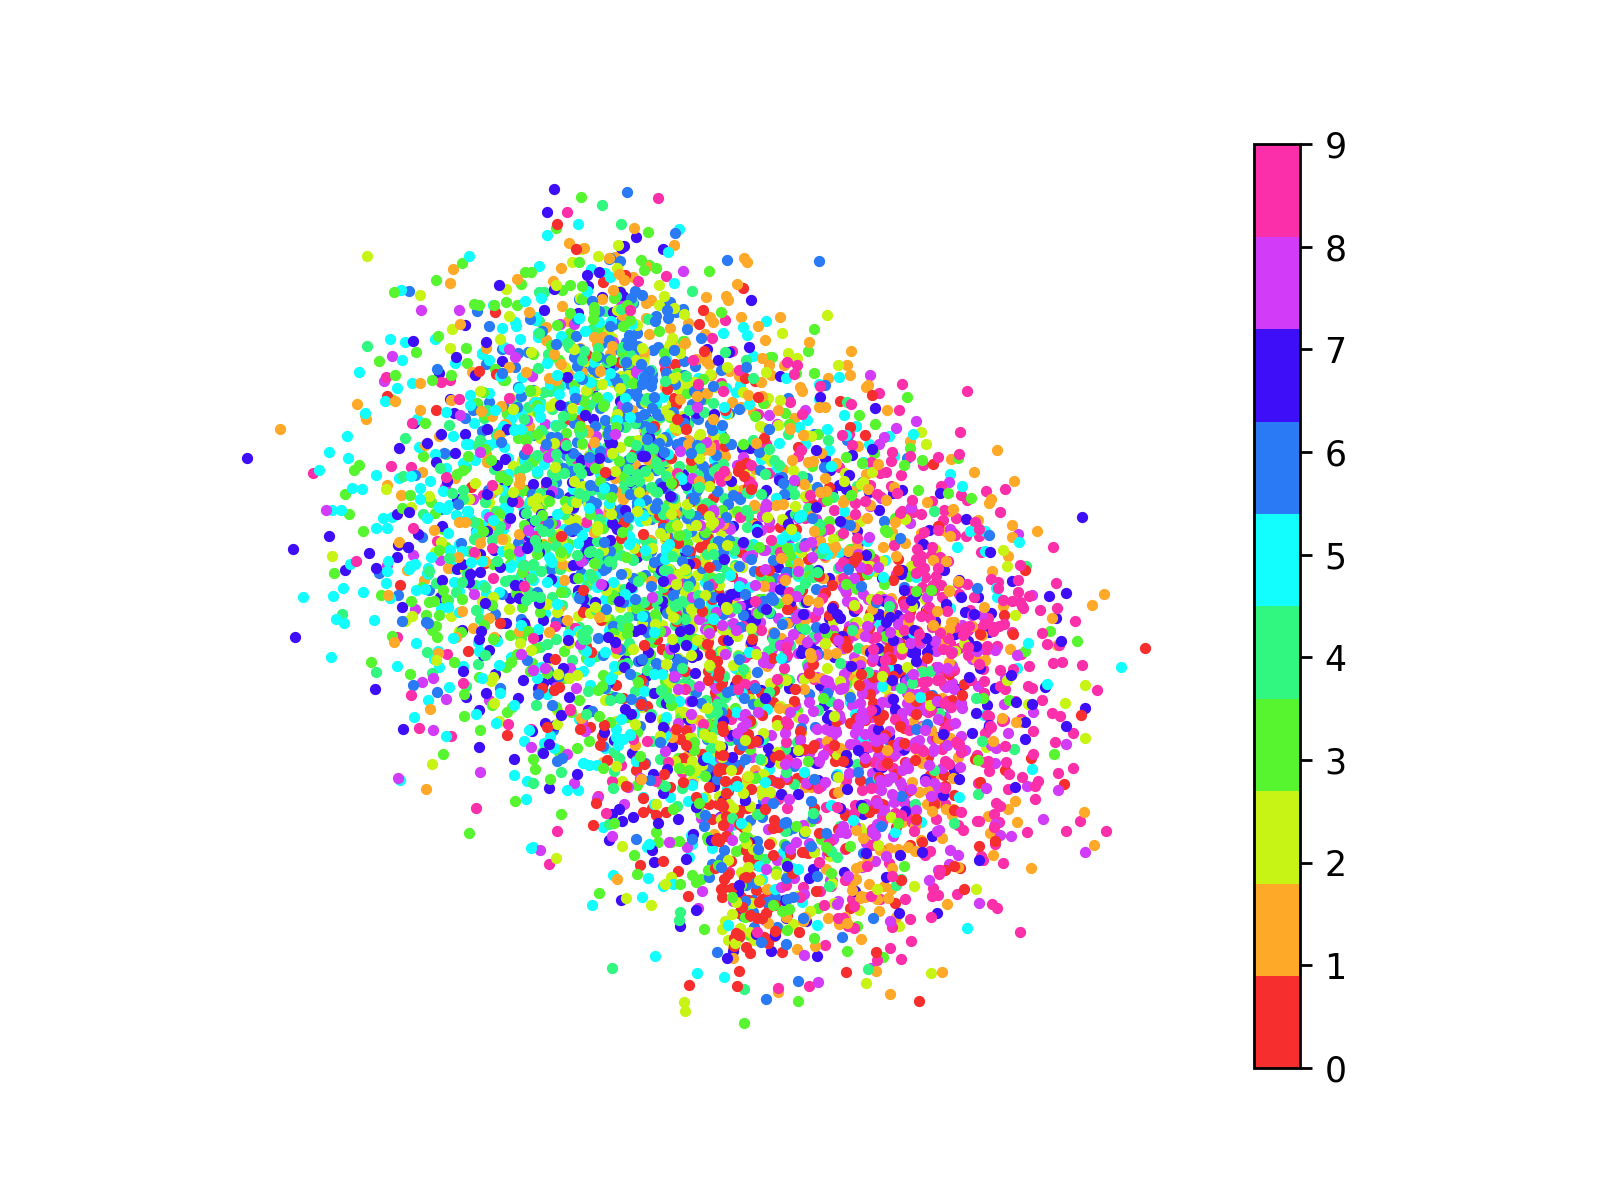

Finished networkx visualization in  577.7617473602295  secs


In [8]:
springyknn.viz_spring_graph(G, dim=2, iterations=150, scale=1.0)